# EDA Q2: Which city, on average, has the most expensive homes?

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1. Import Data

In [57]:
data = pd.read_csv('csv_files/added_features_data.csv',index_col=0)
dummy_data = pd.read_csv('csv_files/preprocessed_dummy_data.csv',index_col=0)
final_data = pd.concat([data,dummy_data],axis=1)

In [58]:
final_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long,sqft_living15,...,waterfront,view,condition,quarter_sold,year_sold,decade_built,grade_binned,renovated,basement,city
0,538000.00000,3,2.25000,2570,7242,2.00000,2170,47.72100,-122.31900,1690,...,0,0,3,4,2014,1950,Fair,1,1,Seattle
1,571000.00000,4,2.00000,2750,7807,1.50000,2250,47.71680,-122.28700,1510,...,0,0,5,2,2014,1910,Fair,0,1,Seattle
2,315000.00000,3,1.00000,960,6634,1.00000,960,47.72640,-122.31000,1570,...,0,0,3,2,2014,1950,Fair,0,0,Seattle
3,382500.00000,2,1.00000,1190,4440,1.00000,1190,47.71350,-122.28700,1060,...,0,0,3,3,2014,1980,Fair,0,0,Seattle
4,425000.00000,3,1.75000,2500,6840,1.00000,1300,47.72220,-122.32000,1580,...,0,0,3,3,2014,1950,Fair,0,1,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19082,3640000.00000,5,6.00000,5490,19897,2.00000,5490,47.61650,-122.23600,2910,...,0,0,3,4,2014,2000,High,0,0,Medina
19083,2720000.00000,4,3.25000,3990,18115,2.00000,3990,47.61770,-122.22900,3450,...,0,0,4,4,2014,1980,Good,0,0,Medina
19084,1950000.00000,4,3.50000,4065,18713,2.00000,4065,47.62090,-122.23700,3070,...,0,0,4,3,2014,1980,Good,0,0,Medina
19085,2900000.00000,5,4.00000,5190,14600,2.00000,5190,47.61020,-122.22500,3840,...,0,1,3,4,2014,2010,Good,0,0,Medina


# Average Home Prices from May 2014 - May 2015

In [70]:
df = pd.read_csv('csv_files/kc_house_data.csv')
df['price'].describe()

count     21597.00000
mean     540296.57351
std      367368.14010
min       78000.00000
25%      322000.00000
50%      450000.00000
75%      645000.00000
max     7700000.00000
Name: price, dtype: float64

# 3. Plot Prices for each City

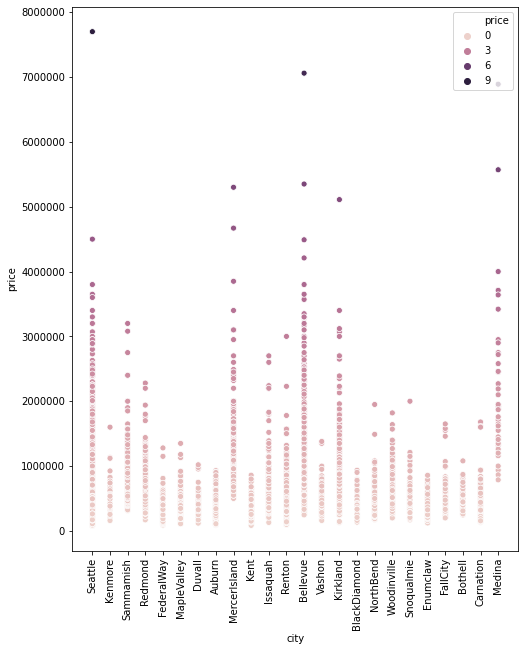

In [59]:
# plot prices for each city
plt.figure(figsize=(8,10))
plt.ticklabel_format(style='plain', axis='y')
ax = sns.scatterplot(x='city',y='price',hue='price',data=final_data)
plt.xticks(rotation=90)
plt.savefig('images/EDA_2_scatter.png');

# 4. Descriptive Statistics

In [61]:
# group prices by city
city_data_statistics = pd.DataFrame(final_data.groupby('city').describe()).reset_index()

# drop column level
city_data_statistics.columns = city_data_statistics.columns.droplevel()

# rename column to city
city_data_statistics = city_data_statistics.rename(columns={list(city_data_statistics)[0]:'city'})

city_data_statistics

,city,count,mean,std,min,25%,50%,75%,max,count,...,75%,max,count,mean,std,min,25%,50%,75%,max
0,Auburn,814.00000,291734.40541,109009.49694,90000.00000,224612.50000,270000.00000,332775.00000,930000.00000,814.00000,...,0.00000,1.00000,814.00000,0.19902,0.39951,0.00000,0.00000,0.00000,0.00000,1.00000
1,Bellevue,1246.00000,909329.42616,571543.89052,247500.00000,554250.00000,752944.00000,1000000.00000,7060000.00000,1246.00000,...,0.00000,1.00000,1246.00000,0.47913,0.49976,0.00000,0.00000,0.00000,1.00000,1.00000
2,BlackDiamond,87.00000,425072.97701,197314.49209,135000.00000,258500.00000,359999.00000,595000.00000,935000.00000,87.00000,...,0.00000,1.00000,87.00000,0.18391,0.38966,0.00000,0.00000,0.00000,0.00000,1.00000
3,Bothell,174.00000,492930.12069,122813.43628,245500.00000,417750.00000,473000.00000,550000.00000,1080000.00000,174.00000,...,0.00000,1.00000,174.00000,0.38506,0.48801,0.00000,0.00000,0.00000,1.00000,1.00000
4,Carnation,109.00000,471750.72477,269590.29962,134000.00000,315000.00000,425000.00000,560000.00000,1680000.00000,109.00000,...,0.00000,1.00000,109.00000,0.15596,0.36450,0.00000,0.00000,0.00000,0.00000,1.00000
5,Duvall,167.00000,430274.92216,131177.95085,119500.00000,334600.00000,406250.00000,505000.00000,1020000.00000,167.00000,...,0.00000,1.00000,167.00000,0.17964,0.38504,0.00000,0.00000,0.00000,0.00000,1.00000
6,Enumclaw,209.00000,315731.94737,125642.96379,122000.00000,231200.00000,278500.00000,346290.00000,858000.00000,209.00000,...,0.00000,1.00000,209.00000,0.15311,0.36096,0.00000,0.00000,0.00000,0.00000,1.00000
7,FallCity,73.00000,549454.38356,316046.95358,200000.00000,340000.00000,457000.00000,685000.00000,1650000.00000,73.00000,...,0.00000,1.00000,73.00000,0.21918,0.41655,0.00000,0.00000,0.00000,0.00000,1.00000
8,FederalWay,692.00000,289478.64451,106772.59113,89000.00000,228585.00000,268250.00000,320000.00000,1280000.00000,692.00000,...,0.00000,1.00000,692.00000,0.38728,0.48748,0.00000,0.00000,0.00000,1.00000,1.00000
9,Issaquah,663.00000,609394.62594,261670.10742,130000.00000,465000.00000,560000.00000,690000.00000,2700000.00000,663.00000,...,0.00000,1.00000,663.00000,0.34540,0.47586,0.00000,0.00000,0.00000,1.00000,1.00000


# 5. Plot Average Price Per City

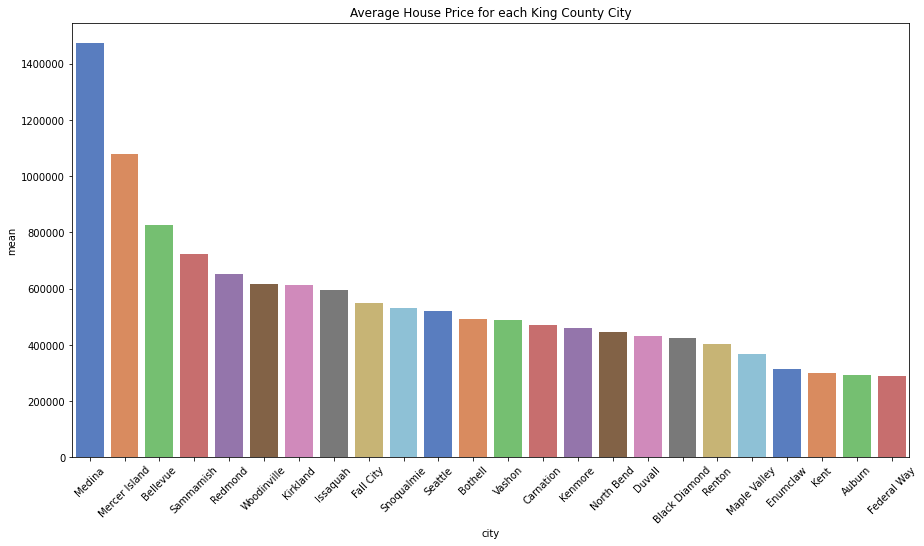

In [63]:
plt.figure(figsize=(15,8))
ax = sns.barplot(y= "mean", x = "city", data = average_city_data,palette=("muted"))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.title('Average House Price for each King County City')
plt.savefig('images/EDA_2_bar.png')
plt.show()

## Interpretation

The city with the highest average price is Medina with an average of 2.2m. After doing more research on Medina, Bill Gates (Founder of Microsoft) and Jeff Bezos (Found of Amazon) along with other big name executives all have houses in Medina. This explains why the prices are so high with the highest house sold from 2014-2015 is 6.9m!

Federal Way is the city with the lowest average price. Though the average house price is low, the standard deviation is ~106,000 which is among the lowest in King County.